In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
# Functions to Profile

def fast_func():
    time.sleep(random.uniform(0.01, 0.015))

def slow_func():
    time.sleep(random.uniform(0.015, 0.020))

In [6]:
def render_profiling_chart(function1, function2, iterations: int=100):
    '''
    Produces profiling report on the performance of 2 functions
    with the given number of iterations run
    '''

    runtimes_1 = np.array([], dtype=float)
    runtimes_2 = np.array([], dtype=float)

    for i in range(iterations):
        start_time = time.time()
        function1()
        runtimes_1 = np.append(runtimes_1, time.time() - start_time)

        start_time = time.time()
        function2()
        runtimes_2 = np.append(runtimes_2, time.time() - start_time)
        if i % 10 == 0:
            print('running')

    plt.hist(runtimes_1, bins=10, alpha=0.5, label='fast')
    plt.hist(runtimes_2, bins=10, alpha=0.5, label='slow')
    plt.xlabel('Run Time', size=14)
    plt.ylabel("Count", size=14)
    plt.title("Performance of Vanilla PyMongo vs PySpark & PyMongo")
    plt.legend(loc='upper right')

running
running
running
running
running
running
running
running
running
running


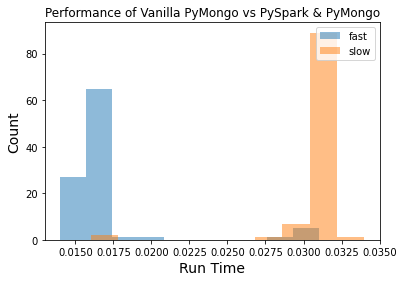

In [7]:
render_profiling_chart(fast_func, slow_func)

running
running
running
running
running
running
running
running
running
running


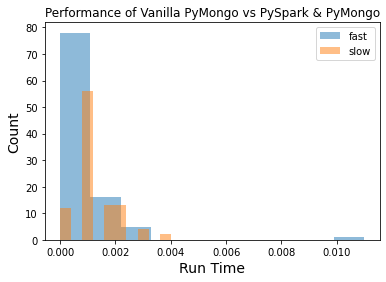

In [9]:
from mongo_queries import MongoSearch

MG = MongoSearch()
render_profiling_chart(MG.randomUsersIds, MG.randomUsersIds)